In [1]:
import pandas as pd
import numpy as np

In [82]:
df = pd.read_csv("preprocessed_data.csv")
df.sample(5)


,Category,Message
4398,0,dad get back
1807,1,today voda number ending 1225 selected receive...
5224,0,oh fuck juswoke bed boatin dock slept wid 25 y...
3748,0,neva tell noe im home da aft wat
2452,0,know complain num onlybettr directly go bsnl o...


In [3]:
df.shape

(5572, 2)

1. Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5568 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [5]:
# df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
# df.sample(5)

In [6]:
df.rename(columns={'Category':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
3410,0,whats coming hill monster! hope great day thin...
2547,0,company goodenvironment terrific food really nice
4805,0,er hello thing didnt quite go plan limping slo...
3632,0,thank princess! sexy
219,0,take exam march 3


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [9]:
df.isnull().sum()

target    0
text      4
dtype: int64

In [10]:
df = df.dropna(subset=['text'])
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(451)

In [12]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(5117, 2)

2.EDA

In [14]:
df.head()

,target,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [15]:
df['target'].value_counts()

target
0    4488
1     629
Name: count, dtype: int64

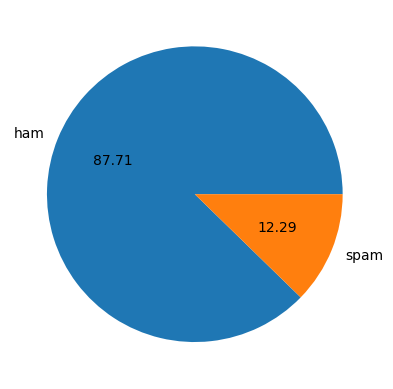

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
# Data is imbalanced
import nltk

In [18]:
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [19]:
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,go jurong point crazy available bugis n great ...,82
1,0,ok lar joking wif u oni,23
2,1,free entry 2 wkly comp win fa cup final tkts 2...,135
3,0,u dun say early hor u c already say,35
4,0,nah dont think go usf life around though,40


In [20]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()


,target,text,num_characters,num_words
0,0,go jurong point crazy available bugis n great ...,82,16
1,0,ok lar joking wif u oni,23,6
2,1,free entry 2 wkly comp win fa cup final tkts 2...,135,23
3,0,u dun say early hor u c already say,35,9
4,0,nah dont think go usf life around though,40,8


In [22]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,go jurong point crazy available bugis n great ...,82,16,1
1,0,ok lar joking wif u oni,23,6,1
2,1,free entry 2 wkly comp win fa cup final tkts 2...,135,23,1
3,0,u dun say early hor u c already say,35,9,1
4,0,nah dont think go usf life around though,40,8,1


In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5117.000000,5117.000000,5117.000000
mean,53.330858,9.927887,1.292554
std,40.890433,7.117966,0.724454
min,1.000000,1.000000,1.000000
25%,23.000000,5.000000,1.000000
50%,39.000000,8.000000,1.000000
75%,77.000000,14.000000,1.000000
max,513.000000,80.000000,12.000000


In [24]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4488.000000,4488.000000,4488.000000
mean,45.932264,8.836230,1.226827
std,36.882013,6.654192,0.658741
min,1.000000,1.000000,1.000000
25%,22.000000,4.000000,1.000000
50%,35.000000,7.000000,1.000000
75%,60.000000,12.000000,1.000000
max,513.000000,80.000000,12.000000


In [25]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,629.000000,629.000000,629.000000
mean,106.120827,17.717011,1.761526
std,26.826549,5.205587,0.961214
min,6.000000,2.000000,1.000000
25%,95.000000,15.000000,1.000000
50%,111.000000,18.000000,1.000000
75%,125.000000,21.000000,2.000000
max,159.000000,29.000000,5.000000


<Axes: xlabel='num_characters', ylabel='Count'>

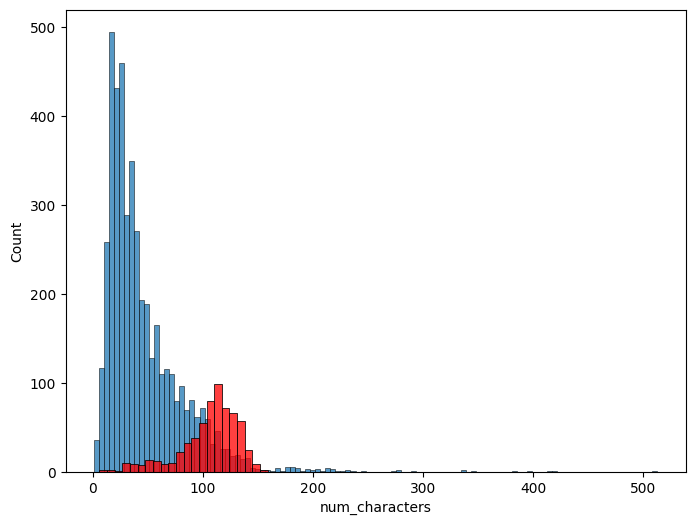

In [26]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

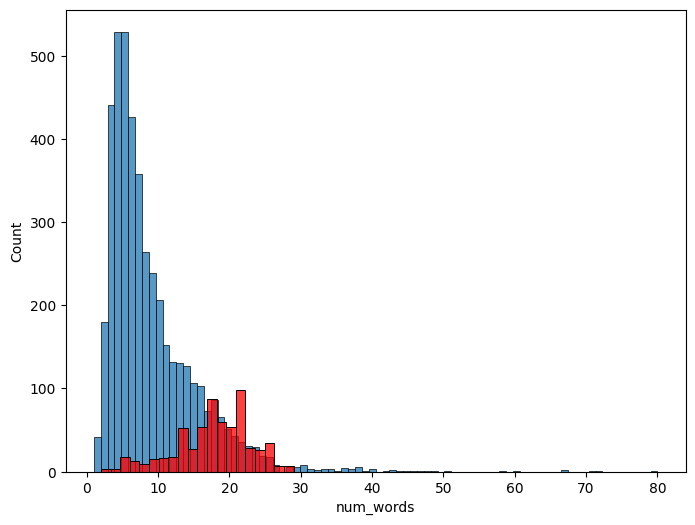

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

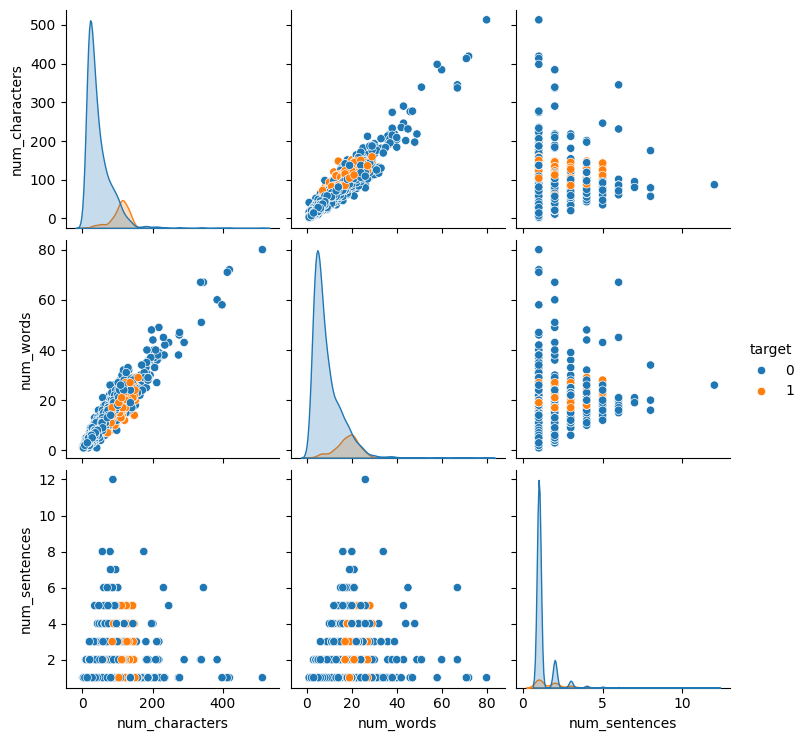

In [28]:
sns.pairplot(df,hue='target')

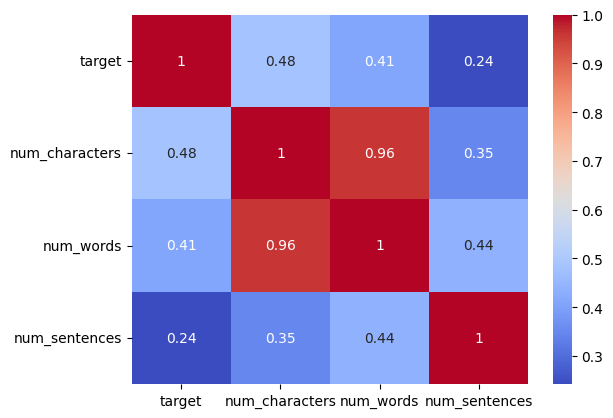

In [29]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()

3.Data preprocessing

In [30]:
# lowercase
# Tokenization
# Remove special characters
# Remove stopwors and punctuations
# stemming

In [31]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps=PorterStemmer()
ps.stem('loving')

'love'

In [32]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [33]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [34]:
df['text'][10]

'im gonna home soon dont want talk stuff anymore tonight k? ive cried enough today'

In [35]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go jurong point crazy available bugis n great ...,82,16,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,23,6,1,ok lar joke wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...,135,23,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say early hor u c already say,35,9,1,u dun say earli hor u c alreadi say
4,0,nah dont think go usf life around though,40,8,1,nah dont think go usf life around though


In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

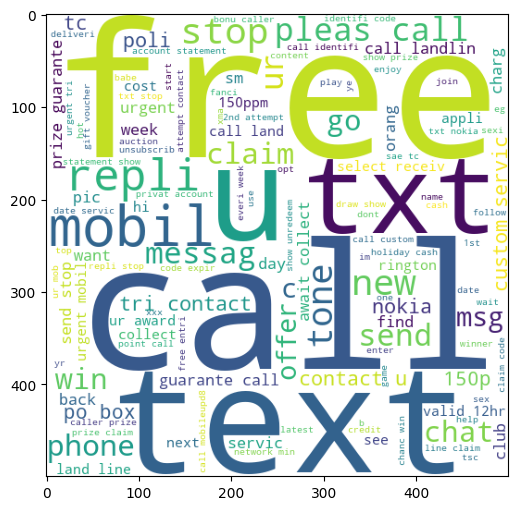

In [37]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

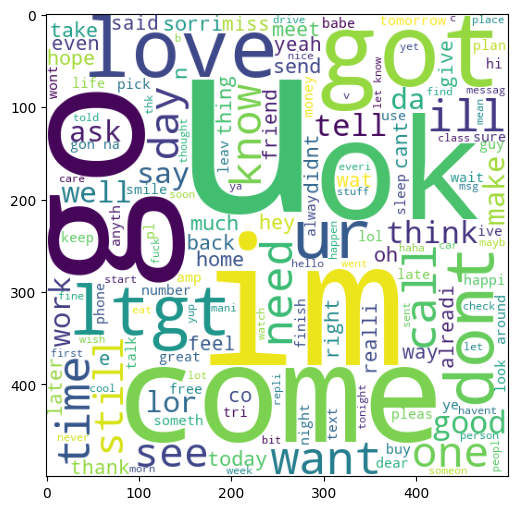

In [38]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go jurong point crazy available bugis n great ...,82,16,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,23,6,1,ok lar joke wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...,135,23,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say early hor u c already say,35,9,1,u dun say earli hor u c alreadi say
4,0,nah dont think go usf life around though,40,8,1,nah dont think go usf life around though


In [40]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

10148

C:\Users\rohit\AppData\Local\Temp\ipykernel_19564\3528256797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=most_common_spam, palette='viridis')


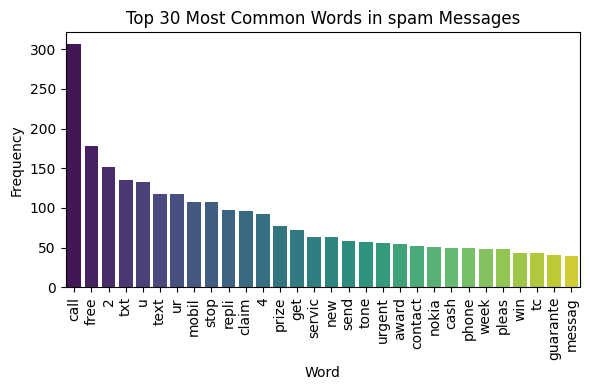

In [42]:
from collections import Counter

most_common_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

plt.figure(figsize=(6, 4))
sns.barplot(x='Word', y='Frequency', data=most_common_spam, palette='viridis')
plt.xticks(rotation=90)
plt.title("Top 30 Most Common Words in spam Messages")
plt.tight_layout()
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

37024

C:\Users\rohit\AppData\Local\Temp\ipykernel_19564\2303546294.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=most_common_ham, palette='viridis')


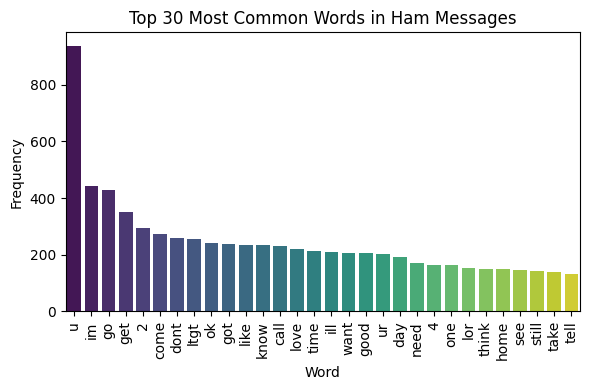

In [45]:
from collections import Counter

most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])


plt.figure(figsize=(6,4))
sns.barplot(x='Word', y='Frequency', data=most_common_ham, palette='viridis')
plt.xticks(rotation=90)
plt.title("Top 30 Most Common Words in Ham Messages")
plt.tight_layout()
plt.show()

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go jurong point crazy available bugis n great ...,82,16,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,23,6,1,ok lar joke wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...,135,23,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say early hor u c already say,35,9,1,u dun say earli hor u c alreadi say
4,0,nah dont think go usf life around though,40,8,1,nah dont think go usf life around though


4. Model Building

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))

In [48]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [49]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [50]:
X.shape

(5117, 5000)

In [51]:
y = df['target'].values

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
# from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [54]:
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()

In [55]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1)) 

In [56]:
# mnb.fit(X_train,y_train)
# y_pred2 = mnb.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

In [57]:
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=2)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))


0.9765625
[[905   0]
 [ 24  95]]
1.0


In [59]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [60]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [61]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [62]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

In [63]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [64]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [65]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
# performance_df

In [66]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
# performance_df1

In [67]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [68]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rf,open('model.pkl','wb'))